In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"using device : {device}")

using device : cpu


In [3]:
# create some data using linear regression formula
weight = 0.7
bias = 0.3

In [4]:
start = 0
end = 1
step = 0.02
X = torch.arange(start,end, step).unsqueeze(dim=1)

y =weight * X + bias

In [5]:
# split data
train_split = int(0.8* len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]

In [6]:
def plot_predictions(train_data = X_train, train_labels =y_train,
                     test_data = X_test , test_labels = y_test,
                     predictions = None):
    """
    plot training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))

    #plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s = 4, label = "Training data")
    plt.scatter(test_data, test_labels, c="g", s = 4, label = "Test data")

    if predictions is not None:

     plt.scatter(test_data, predictions, c = "r", s = 4, label = "predictions")

    # show legend

    plt.legend(prop={"size": 14});

In [7]:
class LinerRegressionModuleV2(nn.Module):
    def __init__(self):
     super().__init__()
     #use nn.Linear() for creating the model parameters/also called : Linear transform, probing layer , fully connected layer
     self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self,x: torch.Tensor): # --> torch.Tensor
        return self.linear_layer(x)


torch.manual_seed(42)
model_1 = LinerRegressionModuleV2()
model_1, model_1.state_dict()

(LinerRegressionModuleV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [8]:
next(model_1.parameters()).device

device(type='cpu')

In [9]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### Training

for training we need:
*Loss function
*Optimizer
*Training Loop
*Testing Loop


In [12]:
#Setup loss function
loss_fn = nn.L1Loss()
# setup OPtimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [14]:
# let's write a training loop
torch.manual_seed(42)

epochs = 200

# put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    model_1.train()

    #1.forward pass
    y_pred = model_1(X_train)

    #2.calculate the loss
    loss = loss_fn(y_pred,y_train)

    #3.optimizer zero grad
    optimizer.zero_grad()

    #4.perform propagation
    loss.backward()

    #5. optimizer step
    optimizer.step()

    ### testing

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred,y_test)


    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss}  | Test_loss : {test_loss} ")

Epoch : 0 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 10 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 20 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 30 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 40 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 50 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 60 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 70 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 80 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 90 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 100 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 110 | Loss : 0.0012645035749301314  | Test_loss : 0.013801807537674904 
Epoch : 120 | Loss : 0.0012645035749301314  | Test_

In [15]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [16]:
weight,bias

(0.7, 0.3)

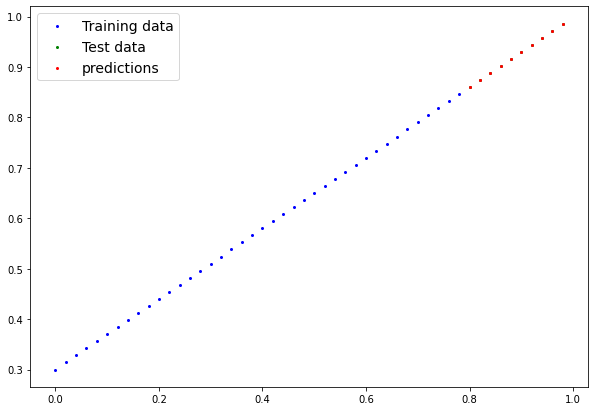

In [19]:
#plot_predictions(predictions=test_pred.detach().numpy())

In [20]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### Making and evaluating predictions

In [21]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

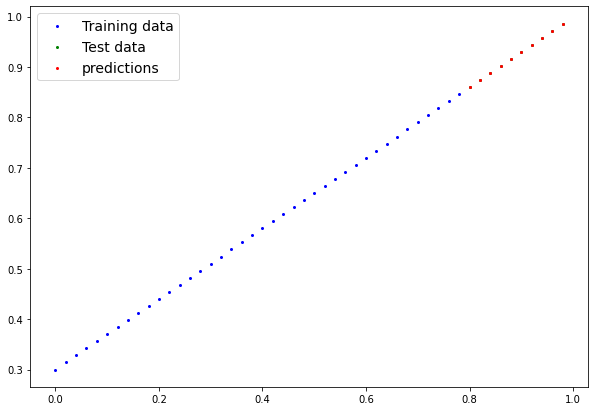

In [22]:
plot_predictions(predictions=y_preds.detach().numpy())

### Saving and loading a model


In [23]:
from pathlib import Path


# 1. create models directory
MODEL_PATH = Path("models_trail")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. create model save path

MODEL_NAME = "001.model_pytorch_trail"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3.save the model state dict

print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

saving model to : models_trail\001.model_pytorch_trail
